In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sns

In [0]:
data = pd.read_csv("Social_Network_Ads.csv")

In [383]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<h4>According to our Dataset we want to predict whether the customer Purchased or not Purchased on the basis of their gender,age,estimated salary as their parameters.</h4>

In [0]:
# Here User ID is not suitable to predict the results,so we are ignore this coloumn.

data = data[['Gender','Age','EstimatedSalary','Purchased']]

In [385]:
print(data.head())

   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0


In [386]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

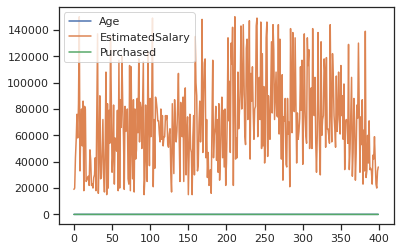

In [387]:
data.plot()

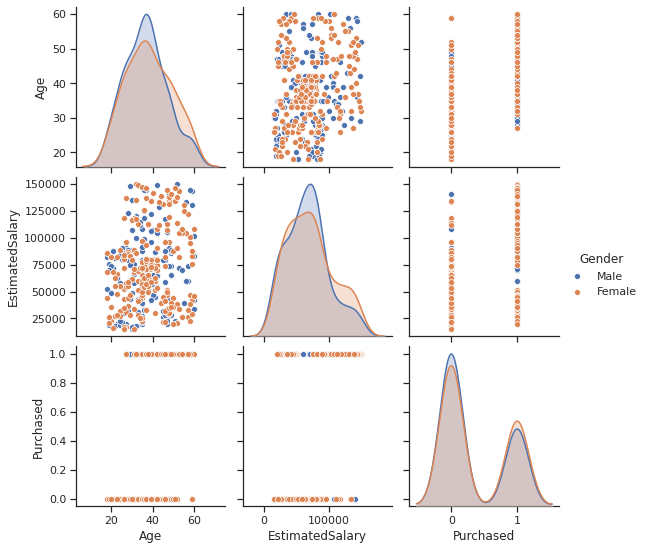

In [388]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data, hue="Gender")

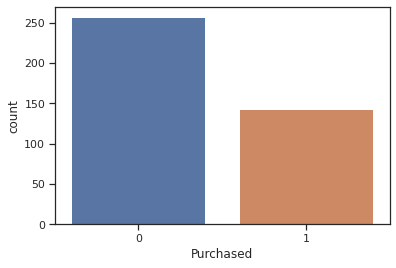

In [389]:
# Here We Check The Total No. Who Purchased or Not Purchased
sns.countplot(x="Purchased",data=data)

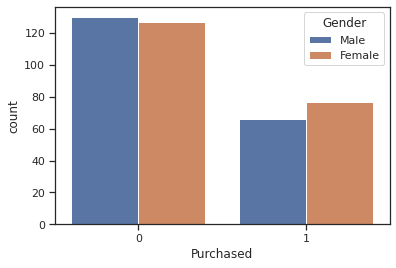

In [390]:
# As We See here mostly female's like to buy product then male's
sns.countplot(x="Purchased",hue="Gender",data=data)

In [391]:
# Now Lets Convert The Variables into dummy variabels for our ML model.
# If the Value of 1 in Male Then i.e male if value is 1 in Female then i.e Female 
pd.get_dummies(data['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [392]:
sex = pd.get_dummies(data['Gender'],drop_first=True)
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [0]:
data_p = pd.concat([data,sex],axis=1)

In [394]:
data_p.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [0]:
# Now There is a Gender Column which we do neet further because we have converted into dummies and concat the male column in data set
data_p = data_p.drop(['Gender'],axis=1)

In [396]:
data_p.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [0]:
# Now Lets Split The Data

In [0]:
X = data_p[['Age','EstimatedSalary','Male']].values
y = data_p['Purchased'].values

In [0]:
# Now Train our Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [0]:
# Preprocessing
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log = LogisticRegression()
log.fit(X_train,y_train)
predict = log.predict(X_test)

In [0]:
# Now Lets See The Accuracy Of our model

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [431]:
print(confusion_matrix(y_test,predict))

[[74  5]
 [ 8 33]]


In [432]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



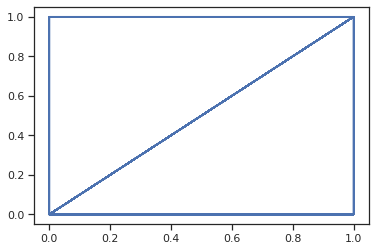

In [433]:
plt.plot(y_test,predict)
plt.show()